In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import matplotlib.cm as cm
from __future__ import division

rc('text',usetex = True)
rc('font', family='serif')

In [2]:
cfm = 60
Ca = cfm*1005*0.00047194745*1.225
Cf = 4148*145.108/3600
ECr = [0.6644*Ca/3/Cf,0.4204*Ca/Cf,0.5509*Ca/Cf]
ECr

[0.04617722285841116, 0.08765610094676121, 0.1148661893710056]

In [3]:
Qc = [
    [88.43186763,91.72651461,102.0538225],
    [92.16859143,96.85422141,106.3528796],
    [97.70441001,104.3770276,110.4868372]

]

Ts = [
    [35.0154215, 34.0888585,34.00420067],
    [33.93070062,33.07165046,32.67060907],
    [33.08091867,32.30273105,31.3882323]
]

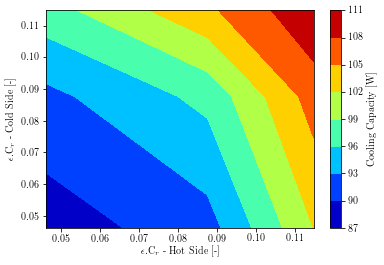

In [4]:
fig, ax = plt.subplots()

contourf(ECr,ECr,Qc, cmap=plt.cm.jet)
colorbar(label = 'Cooling Capacity [W]')
xlabel('$\epsilon$.C$_r$ -  Hot Side [-]')
ylabel('$\epsilon$.C$_r$ - Cold Side [-]')

show()

fig.savefig('Q_c.png',format = 'png', dpi=1000,bbox_inches='tight')

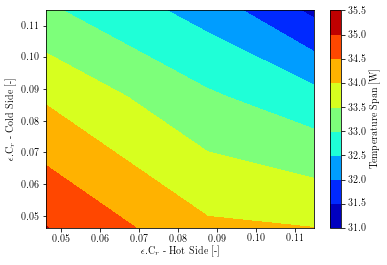

In [5]:
fig, ax = plt.subplots()

contourf(ECr,ECr,Ts, cmap=plt.cm.jet)
colorbar(label = 'Temperature Span [W]')
xlabel('$\epsilon$.C$_r$ -  Hot Side [-]')
ylabel('$\epsilon$.C$_r$ - Cold Side [-]')

show()

fig.savefig('Tspan.png',format = 'png', dpi=1000,bbox_inches='tight')

In [6]:
ECt = [0.024,0.0393,0.0557,0.06891,0.08714,0.11372,0.25,0.5,0.63,0.7,0.757,0.96,1]
dTt = [41.76,39.2,36.3,35.01,33.07,31.38,26.21,23.43,22.66,22.35,22.32,21.58,21.44]
Qct = [43.97,65.13,77.84,88.43,96.85,110.48,134.74,149.12,153.653,155.2154,155.8143,159.044,159.73]

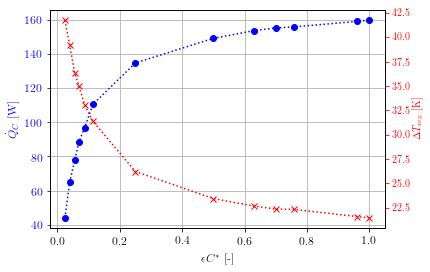

In [7]:
fig, ax = plt.subplots()

ax.plot(ECt,Qct,'bo:')
#ax.plot(ECf,M[0][0]*(ECf**M[0][1]),'bo:')

xlabel('$ \epsilon C^*$ [-]',fontsize = 12)
ylabel('$ \dot{Q}_C $ [W]',fontsize = 12,color='b')
ax.tick_params('y', colors='b')
yticks(fontsize = 'large')
xticks(fontsize = 'large')
ax.grid(True)
yticks(fontsize=12)

#axvspan(0.1, 0.12,0.85 ,1, color='blue', alpha=0.1)

#axvspan(0.065, 0.12,0 ,0.4, color='red', alpha=0.1)

ax3 = ax.twinx()
ax3.plot(ECt,dTt, ':xr')
ax3.set_ylabel('$\Delta T_{\mathrm{reg}} $ [K]', color='r')
ax3.tick_params('y', colors='r')
#xlim([0.02,0.25])

show()

fig.savefig('ECr.pdf',format = 'pdf', dpi=1200,bbox_inches='tight')

In [8]:
def Qc(E,a,b):
    return a*log(E)+b

In [9]:
from scipy.optimize import curve_fit

In [10]:
ECf = [0.0393,0.0557,0.06891,0.08714,0.11372,0.25]
Qcf = [65.13,77.84,88.43,96.85,110.48,134.74]

In [11]:
M = curve_fit(Qc,ECf,Qcf)

In [12]:
M

(array([ 38.27057845, 189.97787827]), array([[ 2.76054771,  6.80926339],
        [ 6.80926339, 17.74695436]]))

In [13]:
abs(Qc(ECf,M[0][0],M[0][1])-Qcf)/Qcf*100

array([1.51078445, 2.08254566, 0.93198872, 0.26999452, 3.3517119 ,
       1.62059609])